In [6]:
# 연습문제 13 p276, node (22)
import numpy as np
from scipy import stats

# 딕셔너리로 데이터 입력 / np.array 혹은 리스트도 가능
sampleA = {'n1': 12, 'x1': 35, 's1': 4.2}
sampleB = {'n2': 16, 'x2': 43, 's2': 3.7}

# 통합분산 계산
pooled_var = ((sampleA['n1'] - 1) * sampleA['s1']**2 + (sampleB['n2'] - 1) * sampleB['s2']**2) / (sampleA['n1'] + sampleB['n2'] - 2)
print(f'통합분산: {pooled_var:.4f}')

# t-검정
t_stat, p_value = stats.ttest_ind_from_stats(sampleA['x1'], sampleA['s1'], sampleA['n1'], sampleB['x2'], sampleB['s2'], sampleB['n2'], equal_var=True)
print(f'p-value: {p_value}\n')

alpha = 0.05
if p_value < alpha:   
    print(f"p-value는 {p_value:.4f}로, 유의 수준 {alpha}보다 작다.\n따라서 귀무 가설을 기각한다. \n")    
else:
    print(f"p-value는 {p_value:.4f}로, 유의 수준 {alpha}보다 크거나 같다.\n따라서 귀무 가설을 기각할 수 없음 \n")  

# 두 모평균의 차이에 대한 95% 신뢰구간 계산
diff_mean = sampleA['x1'] - sampleB['x2']
se = np.sqrt(pooled_var * (1/sampleA['n1'] + 1/sampleB['n2']))
margin_of_error = stats.t.ppf(0.975, df=sampleA['n1']+sampleB['n2']-2) * se
ci = [diff_mean - margin_of_error, diff_mean + margin_of_error]
print(f'두 모평균의 차이에 대한 95% 신뢰구간 : [{ci[0]:.4f} < mi1 - mu2 < {ci[1]:.4f}]')


통합분산: 15.3612
p-value: 1.3550195956491572e-05

p-value는 0.0000로, 유의 수준 0.05보다 작다.
따라서 귀무 가설을 기각한다. 

두 모평균의 차이에 대한 95% 신뢰구간 : [-11.0766 < mi1 - mu2 < -4.9234]


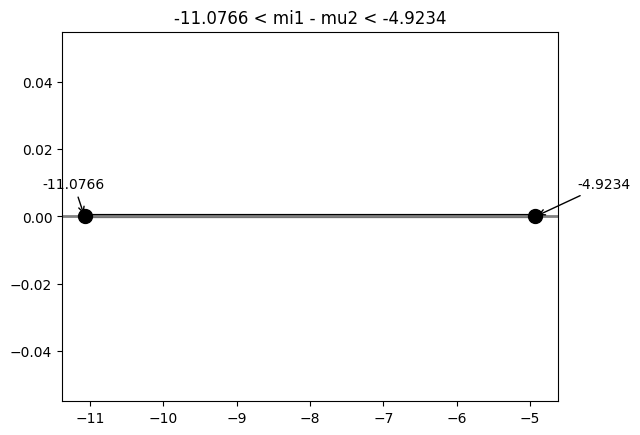

In [7]:
# 연습문제 13 p276, node (22) + 시각화
import matplotlib.pyplot as plt

# 구간 정의
lower = -11.0766
upper = -4.9234

# 그래프 생성
fig, ax = plt.subplots()
ax.plot([lower, upper], [0, 0], 'k-', linewidth=3)
ax.axhline(0, color='grey', lw=2)
ax.scatter([lower, upper], [0, 0], s=100, color='k', zorder=10)
ax.annotate(f'{lower}', xy=(lower, 0), xytext=(-30, 20), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
ax.annotate(f'{upper}', xy=(upper, 0), xytext=(30, 20), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

plt.title('-11.0766 < mi1 - mu2 < -4.9234')
plt.show()
